In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
session = pd.read_csv('Data/sessions.csv')
final = pd.read_csv('Data/final_grades.csv')
inter = pd.read_csv('Data/inter_grades.csv')

In [46]:
# make sessions and student ids categorical
for col in ['session', 'student_id']:
    session[col] = session[col].astype('category')

# convert start and end time column dtypes to datetime    
for col in ['start_time', 'end_time']:
    session[col] =  pd.to_datetime(session[col], format='%Y-%m-%d %H:%M:%S')

# calculate the time difference between end and start time in seconds
session['time_delta']=(pd.to_timedelta(session['end_time'])-pd.to_timedelta(session['start_time'])).astype('timedelta64[s]')

# print out column dtypes
session.columns.to_series().groupby(session.dtypes).groups

{dtype('O'): ['exercise', 'activity'],
 dtype('int64'): ['Unnamed: 0',
  'idle_time',
  'mouse_wheel',
  'mouse_wheel_click',
  'left_click',
  'right_click',
  'mouse_movement',
  'keystroke'],
 dtype('float64'): ['time_delta'],
 dtype('<M8[ns]'): ['start_time', 'end_time'],
 category: ['session', 'student_id']}

In [50]:
ag = session.groupby(['student_id']).mean()

In [52]:
ag.columns

Index(['Unnamed: 0', 'idle_time', 'mouse_wheel', 'mouse_wheel_click',
       'left_click', 'right_click', 'mouse_movement', 'keystroke',
       'time_delta'],
      dtype='object')

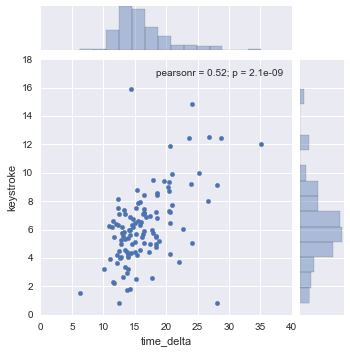

In [55]:
#ag.plot(kind="scatter", x="time_delta", y="keystroke")
sns.jointplot(x="time_delta", y="keystroke", data=ag, size=5)